    I am an analyst at a big online store. Together with the marketing department, I've compiled a list of hypotheses that may help boost revenue.
    I need to prioritize these hypotheses, launch an A/B test, and analyze the results.


Firstly, I need to import libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats
import random
import numpy as np
from matplotlib import pyplot
import seaborn as sns
import plotly.express as px

    I have 3 df's:
1) List of hypotheses
    
2) Orders

3) Visits

Let's read those dfs.

In [2]:
hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [3]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [4]:
orders = pd.read_csv('orders_us.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [6]:
orders.describe(include='all')

,transactionId,visitorId,date,revenue,group
count,1.197000e+03,1.197000e+03,1197,1197.000000,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05,NaN,B
freq,NaN,NaN,48,NaN,640
mean,2.155621e+09,2.165960e+09,NaN,131.491646,NaN
std,1.229085e+09,1.236014e+09,NaN,603.004729,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000,NaN
25%,1.166776e+09,1.111826e+09,NaN,20.800000,NaN
50%,2.145194e+09,2.217985e+09,NaN,50.200000,NaN
75%,3.237740e+09,3.177606e+09,NaN,130.400000,NaN


In [7]:
visits = pd.read_csv('visits_us.csv')
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
visits.describe(include='all')

,date,group,visits
count,62,62,62.000000
unique,31,2,NaN
top,2019-08-01,A,NaN
freq,2,31,NaN
mean,NaN,NaN,607.290323
std,NaN,NaN,114.400560
min,NaN,NaN,361.000000
25%,NaN,NaN,534.000000
50%,NaN,NaN,624.500000
75%,NaN,NaN,710.500000


    For preparing data to analysis I will do:
1) In 'hypotheses' I will change names of columns to lowercase

2) In 'orders' I will change names of columns to snake_case

3) In 'orders' I will change types of values in [date] to dt, in [group] to category

4) In 'visits' I will change types of values in [date] to dt, in [group] to category

5) All dfs need to be checked for duplicates

6) In 'orders' need to check obvious outliers in column [revenue], because from describe method we see, that max value is 19920, and 75% is only 130

In [68]:
print(hypotheses.columns)
hypotheses.columns = hypotheses.columns.str.lower()
print(hypotheses.columns)

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort'], dtype='object')
Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')


In [69]:
print(orders.columns)
orders = orders.rename(columns={"transactionId": "transaction_id", "visitorId": "visitor_id"})
print(orders.columns)

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')
Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


    Wrong types:

In [70]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1197 non-null   int64  
 1   visitor_id      1197 non-null   int64  
 2   date            1197 non-null   object 
 3   revenue         1197 non-null   float64
 4   group           1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


In [71]:
orders['group'] = orders['group'].astype('category')
orders['date'] = pd.to_datetime(orders['date'], format="%Y-%m-%d")
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.9 KB


In [72]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


In [73]:
visits['group'] = visits['group'].astype('category')
visits['date'] = pd.to_datetime(visits['date'], format="%Y-%m-%d")
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.4 KB


In [74]:
print(orders.duplicated().sum())
print(visits.duplicated().sum())

0
0


We don't have duplicates.

In [75]:
orders.sort_values(by='revenue', ascending=False)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
858,192721366,1316129916,2019-08-27,1450.2,A
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
...,...,...,...,...,...
390,2415738512,2038680547,2019-08-25,5.2,A
414,2505918657,2524310328,2019-08-06,5.2,B
602,2356264591,1224903511,2019-08-09,5.1,A
404,2052514069,1995481842,2019-08-28,5.1,B


We have one transaction with value 19920.4, that more than in six times more, than second one.

This outlier will greatly distort the graphs in further analysis, so I decided to remove it.

In [76]:
orders[orders['visitor_id']==1920142716]

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B


It was one visitor with one very big order, so I just delete it.

In [77]:
orders = orders.drop(425).reset_index(drop=True)
orders.sort_values(by='revenue', ascending=False)

,transaction_id,visitor_id,date,revenue,group
1195,3936777065,2108080724,2019-08-15,3120.1,B
857,192721366,1316129916,2019-08-27,1450.2,A
1135,666610489,1307669133,2019-08-13,1425.8,A
743,3668308183,888512513,2019-08-27,1335.6,B
661,1811671147,4266935830,2019-08-29,1220.2,A
...,...,...,...,...,...
390,2415738512,2038680547,2019-08-25,5.2,A
414,2505918657,2524310328,2019-08-06,5.2,B
601,2356264591,1224903511,2019-08-09,5.1,A
404,2052514069,1995481842,2019-08-28,5.1,B


For further analysis need to check whether we have users in both of group or not.

Firstly create 2 dfs:

In [78]:
group_a = orders[orders['group']=='A'].reset_index(drop=True)
group_a

,transaction_id,visitor_id,date,revenue,group
0,2961555356,4069496402,2019-08-15,10.2,A
1,2626614568,78758296,2019-08-15,20.1,A
2,1576988021,295230930,2019-08-15,215.9,A
3,3649131742,879864040,2019-08-15,65.7,A
4,2809384911,3213223594,2019-08-15,115.4,A
...,...,...,...,...,...
552,2274188238,132143192,2019-08-14,15.5,A
553,1692103379,1022829655,2019-08-14,5.7,A
554,2203539145,370388673,2019-08-14,50.1,A
555,1807773912,573423106,2019-08-14,165.3,A


In [79]:
group_b = orders[orders['group']=='B'].reset_index(drop=True)
group_b

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,3797467345,1196621759,2019-08-15,155.1,B
3,2282983706,2322279887,2019-08-15,40.5,B
4,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
634,4082620617,393266494,2019-08-14,490.4,B
635,38478481,1197745035,2019-08-14,135.3,B
636,3592955527,608641596,2019-08-14,255.7,B
637,2662137336,3733762160,2019-08-14,100.8,B


Then we can merge those two dfs, and calculate, how many users are in both groups:

In [80]:
users_in_both = group_b.merge(group_a, on='visitor_id', how='inner')
users_in_both

,transaction_id_x,visitor_id,date_x,revenue_x,group_x,transaction_id_y,date_y,revenue_y,group_y
0,2904772834,963407295,2019-08-15,5.6,B,1458356232,2019-08-14,80.0,A
1,4252514150,351125977,2019-08-15,235.6,B,3075639014,2019-08-06,70.0,A
2,1162046357,3234906277,2019-08-15,120.2,B,1360774578,2019-08-18,120.2,A
3,1630050528,237748145,2019-08-15,120.2,B,2594268419,2019-08-15,20.8,A
4,1630050528,237748145,2019-08-15,120.2,B,3702128013,2019-08-20,20.8,A
...,...,...,...,...,...,...,...,...,...
178,3620682463,2654030115,2019-08-13,35.5,B,1254962016,2019-08-14,35.5,A
179,2357685128,818047933,2019-08-14,10.2,B,4276811111,2019-08-28,55.2,A
180,2289555915,3963646447,2019-08-14,120.2,B,1277417350,2019-08-14,100.2,A
181,2676541142,471551937,2019-08-14,55.2,B,3734714128,2019-08-05,355.1,A


In [81]:
users_in_both['visitor_id'].nunique()

58

58 is big count for our not big dataframes, but I don't see any other solution, except to delete those users.

In [82]:
wrong_users = users_in_both[['visitor_id']].drop_duplicates().reset_index(drop=True)
wrong_users.head()

,visitor_id
0,963407295
1,351125977
2,3234906277
3,237748145
4,2038680547


In [83]:
display(group_a[group_a['visitor_id']==963407295])
display(group_b[group_b['visitor_id']==963407295])

,transaction_id,visitor_id,date,revenue,group
550,1458356232,963407295,2019-08-14,80.0,A


,transaction_id,visitor_id,date,revenue,group
12,2904772834,963407295,2019-08-15,5.6,B


Example: this visitor is in both groups, made 1 order for each.

In [84]:
group_a = (pd.merge(group_a, wrong_users, indicator=True, how='outer')
         .query('_merge=="left_only"')
         .drop('_merge', axis=1)).reset_index(drop=True)
group_a

,transaction_id,visitor_id,date,revenue,group
0,2626614568,78758296,2019-08-15,20.1,A
1,1576988021,295230930,2019-08-15,215.9,A
2,3649131742,879864040,2019-08-15,65.7,A
3,2809384911,3213223594,2019-08-15,115.4,A
4,3859315276,1565034404,2019-08-15,170.9,A
...,...,...,...,...,...
463,948555526,2710193528,2019-08-14,15.2,A
464,2274188238,132143192,2019-08-14,15.5,A
465,1692103379,1022829655,2019-08-14,5.7,A
466,2203539145,370388673,2019-08-14,50.1,A


In [85]:
group_b = (pd.merge(group_b, wrong_users, indicator=True, how='outer')
         .query('_merge=="left_only"')
         .drop('_merge', axis=1)).reset_index(drop=True)
group_b

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,3797467345,1196621759,2019-08-15,155.1,B
3,2282983706,2322279887,2019-08-15,40.5,B
4,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
542,2116724386,2146711261,2019-08-14,240.6,B
543,38478481,1197745035,2019-08-14,135.3,B
544,3592955527,608641596,2019-08-14,255.7,B
545,2662137336,3733762160,2019-08-14,100.8,B


In [86]:
display(group_a[group_a['visitor_id']==963407295])
display(group_b[group_b['visitor_id']==963407295])

,transaction_id,visitor_id,date,revenue,group


,transaction_id,visitor_id,date,revenue,group


So, I deleted all users, that were consisted in both groups.

With this information I need to go to marketing department and ask, why so many users were in both groups.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you added a very detailed data evaluation.     
    
In general, the situation with users in both groups is strange and on a real project it is worth asking the one who collected the data what went wrong. In this case, there are not so many users, so they can also be left as is.

In addition, we will not be able to identify user data in the table with visits, and deleting them from only one table with orders will not be entirely correct for further analysis.
    
PS: Another way to find a given intersection is with: np.intersect1d
    
    len(np.intersect1d(orders_filtered.query('group == "A"')['visitor_id'], orders_filtered.query('group == "B"')['visitor_id'], assume_unique = False))

<div style="padding: 15px;">
<b>Let's start analysis</b></div>

<div style="padding: 15px;">
<b>Prioritizing Hypotheses</b></div>

    Apply the ICE (Impact, Confidence, Effort/Ease) framework to prioritize hypotheses. Sort them in descending order of priority

In [87]:
hypotheses['ICE'] = (hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
pd.options.display.max_colwidth = 210
hypotheses.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
As a minor thing, you can round ICE metric.
    
And you can add the following code to display the full name of the hypotheses in the tables:
    
    pd.options.display.max_colwidth = 210

<div class="alert alert-info"> <b>I fixed it, thank you</b></div>  

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
👏

    Apply the RICE (Reach, Impact, Confidence, Effort/Ease) framework to prioritize hypotheses. Sort them in descending order of priority

In [88]:
hypotheses['RICE'] = (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence']) /hypotheses['effort']
hypotheses.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


Since the reach is in the numerator, the larger it is, the significantly larger the final number will be. That's why hypotheses with indexes 7 and 2 became the best in RICE method. The best hypothesis in ICE method became only 5th in RICE method, because it has very small reach (value 1).

So I think we can choose one of the hypotheses with indexes 7,2,0,6 (because they has top5 in both methods).

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Overall great job! The `ICE` and `RICE` frameworks have been calculated correctly. And from the results, it is now clear how the reach factor (Reach) affects the overall value of the hypothesis.

Additionally, it would be really cool to create a pair plot to compare all the metrics for each hypothesis and compare them.
    
For an outside reader (for example, a business customer) it would also be interesting to add a brief description of the frameworks and how they work.
    


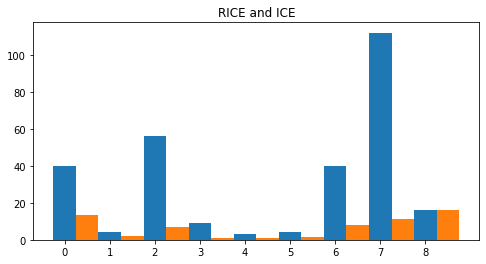

In [89]:
plt.figure(figsize=(8, 4))
plt.xticks(hypotheses.index)
plt.bar(hypotheses.index, hypotheses['RICE'], width=0.5)
plt.bar(hypotheses.index+0.5, hypotheses['ICE'], width=0.5)
plt.title('RICE and ICE')
plt.show()

<div class="alert alert-info"> <b>I added this barchart, but didn't understand what did you mean 'a pair plot to compare all the metrics for each hypothesis'.</b></div>  

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>


I meant smth like this using paiplot:

	df1=hyp_w[['hypothesis','RICE']].rename(columns={'RICE':'SCORE'})
	df1['score_name'] = 'RICE'
	df2=hyp_w[['hypothesis','ICE']].rename(columns={'ICE':'SCORE'})
	df2['score_name'] = 'ICE'
	df = pd.concat([df1, df2])
	
	
	df['HYPOTHESIS'] = pd.Series(['H0','H1','H2','H3','H4','H5','H6','H7','H8','H0','H1','H2','H3','H4','H5','H6','H7','H8'])
	g = sns.pairplot(df, x_vars=['HYPOTHESIS'], y_vars=['SCORE'], hue='score_name', height=6, aspect=2.3)
	plt.grid()
	plt.title('...')
	plt.show()

or: 

    fig = px.scatter(df_hypothesis, x='ICE', y='RICE', color='hypothesis',  symbol="species", height=800)

    fig.update_layout(
        title_text='...', title_x=0.5,
        xaxis_title_text='"ICE"',
        yaxis_title_text='"RICE"',
        legend_title_text='Hypotheses')

    fig.update_layout(legend=dict(orientation="h"))

    fig.show()

In [93]:
df1=hypotheses[['hypothesis','RICE']].rename(columns={'RICE':'SCORE'})
df1['score_name'] = 'RICE'
df2=hypotheses[['hypothesis','ICE']].rename(columns={'ICE':'SCORE'})
df2['score_name'] = 'ICE'
df = pd.concat([df1, df2])
df

,hypothesis,SCORE,score_name
0,Add two new channels for attracting traffic. This will bring 30% more users,40.000000,RICE
1,Launch your own delivery service. This will shorten delivery time,4.000000,RICE
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.000000,RICE
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.000000,RICE
4,Change the background color on the main page. This will increase user engagement,3.000000,RICE
5,Add a customer review page. This will increase the number of orders,4.000000,RICE
6,Show banners with current offers and sales on the main page. This will boost conversion,40.000000,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.000000,RICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333,ICE


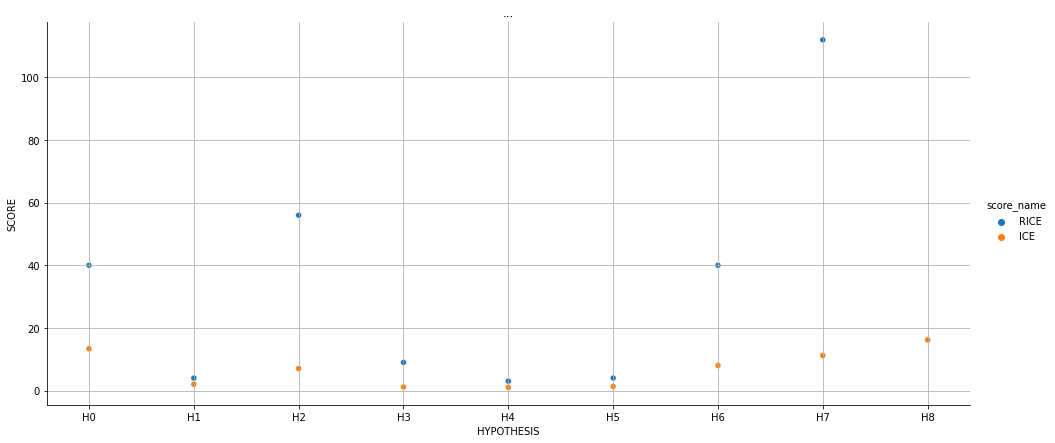

In [94]:
df['HYPOTHESIS'] = pd.Series(['H0','H1','H2','H3','H4','H5','H6','H7','H8','H0','H1','H2','H3','H4','H5','H6','H7','H8'])
g = sns.pairplot(df, x_vars=['HYPOTHESIS'], y_vars=['SCORE'], hue='score_name', height=6, aspect=2.3)
plt.grid()
plt.title('...')
plt.show()

In [102]:
fig = px.scatter(hypotheses, x='ICE', y='RICE', color='hypothesis',  symbol="species", height=800)

fig.update_layout(
    title_text='...', title_x=0.5,
    xaxis_title_text='"ICE"',
    yaxis_title_text='"RICE"',
    legend_title_text='Hypotheses')

fig.update_layout(legend=dict(orientation="h"))

fig.show()

ValueError: Value of 'symbol' is not the name of a column in 'data_frame'. Expected one of ['hypothesis', 'reach', 'impact', 'confidence', 'effort', 'ICE', 'RICE'] but received: species

<div style="padding: 15px;">
<b>A/B Test Analysis</b></div>

    Cumulative revenue by group

In [32]:
by_date_a = group_a.groupby(['date'])['revenue'].sum().reset_index()
by_date_a.head()

,date,revenue
0,2019-08-01,2266.6
1,2019-08-02,1468.3
2,2019-08-03,1815.2
3,2019-08-04,675.5
4,2019-08-05,1398.0


In [33]:
by_date_b = group_b.groupby(['date'])['revenue'].sum().reset_index()
by_date_b.head()

,date,revenue
0,2019-08-01,967.2
1,2019-08-02,2568.1
2,2019-08-03,1071.6
3,2019-08-04,1531.6
4,2019-08-05,1449.3


In [34]:
by_date_a['cumul_rev']=by_date_a['revenue'].cumsum()
print(by_date_a.tail())
by_date_b['cumul_rev']=by_date_b['revenue'].cumsum()
print(by_date_b.tail())

         date  revenue  cumul_rev
26 2019-08-27   2934.7    46539.0
27 2019-08-28   1526.9    48065.9
28 2019-08-29   3068.9    51134.8
29 2019-08-30   1228.9    52363.7
30 2019-08-31    848.3    53212.0
         date  revenue  cumul_rev
26 2019-08-27   1746.9    51964.6
27 2019-08-28   1010.5    52975.1
28 2019-08-29   1681.2    54656.3
29 2019-08-30   3286.8    57943.1
30 2019-08-31   1787.7    59730.8


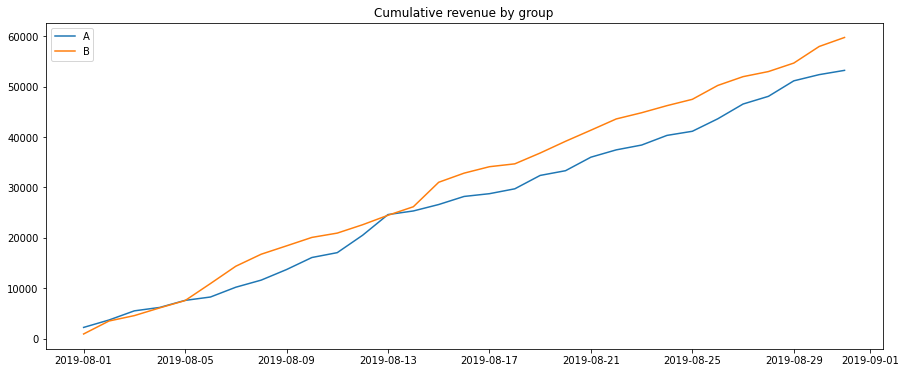

In [35]:
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(by_date_a['date'], by_date_a['cumul_rev'], label='A')
plt.plot(by_date_b['date'], by_date_b['cumul_rev'], label='B')
plt.legend()
plt.title('Cumulative revenue by group')
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
   
Adding titles to your graphs is important for providing context for the users so they understand what they are looking at. Together with for example legends and axis labels this is important to support unambiguous interpretation of displayed information.
    
Can you please add titles to your graphs?

<div class="alert alert-info"> <b>Got it, thanks!</b></div>  

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

Thank you for updating all your graphs. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Agree with your conclusions. 

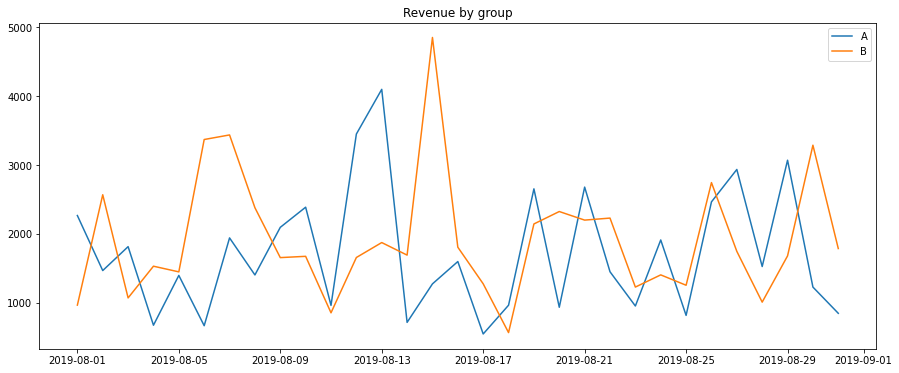

In [36]:
plt.plot(by_date_a['date'], by_date_a['revenue'], label='A')
plt.plot(by_date_b['date'], by_date_b['revenue'], label='B')
plt.legend()
plt.title('Revenue by group')
plt.show()

Here we also see, that groups bahave similar, and graph is very 'peaky'. Sometimes we see that peak of group B similar to peak of group A, sometimes they behave opposite. The explanation should be in the line of business of the company. At the moment I can't figure out why the graph is so 'peaky'.

    Cumulative average order size by group

In [37]:
by_date_a1 = group_a.groupby(['date']).agg({'revenue':'sum', 'transaction_id': 'nunique', 'visitor_id': 'nunique'}).reset_index()
by_date_a1.rename(columns = {'transaction_id' : 'purchases', 'visitor_id' : 'buyers'}, inplace=True)
by_date_a1['cumul_rev']=by_date_a1['revenue'].cumsum()
print(by_date_a1.head())
by_date_b1 = group_b.groupby(['date']).agg({'revenue':'sum', 'transaction_id': 'nunique', 'visitor_id': 'nunique'}).reset_index()
by_date_b1.rename(columns = {'transaction_id' : 'purchases', 'visitor_id' : 'buyers'}, inplace=True)
by_date_b1['cumul_rev']=by_date_b1['revenue'].cumsum()
print(by_date_b1.head())

        date  revenue  purchases  buyers  cumul_rev
0 2019-08-01   2266.6         23      19     2266.6
1 2019-08-02   1468.3         19      18     3734.9
2 2019-08-03   1815.2         24      24     5550.1
3 2019-08-04    675.5         11      11     6225.6
4 2019-08-05   1398.0         22      22     7623.6
        date  revenue  purchases  buyers  cumul_rev
0 2019-08-01    967.2         17      17      967.2
1 2019-08-02   2568.1         23      22     3535.3
2 2019-08-03   1071.6         14      14     4606.9
3 2019-08-04   1531.6         14      13     6138.5
4 2019-08-05   1449.3         21      21     7587.8


Here we see how many purchases, buyers were on the date, and cumulative revenue.

In [38]:
by_date_a1['cumul_purch']=by_date_a1['purchases'].cumsum()
by_date_a1['cumul_avch']=by_date_a1['cumul_rev']/by_date_a1['cumul_purch']
display(by_date_a1.tail())
by_date_b1['cumul_purch']=by_date_b1['purchases'].cumsum()
by_date_b1['cumul_avch']=by_date_b1['cumul_rev']/by_date_b1['cumul_purch']
display(by_date_b1.tail())

,date,revenue,purchases,buyers,cumul_rev,cumul_purch,cumul_avch
26,2019-08-27,2934.7,23,23,46539.0,419,111.071599
27,2019-08-28,1526.9,15,15,48065.9,434,110.750922
28,2019-08-29,3068.9,17,17,51134.8,451,113.380931
29,2019-08-30,1228.9,9,8,52363.7,460,113.834130
30,2019-08-31,848.3,8,8,53212.0,468,113.700855


,date,revenue,purchases,buyers,cumul_rev,cumul_purch,cumul_avch
26,2019-08-27,1746.9,11,11,51964.6,472,110.094492
27,2019-08-28,1010.5,22,22,52975.1,494,107.237045
28,2019-08-29,1681.2,15,15,54656.3,509,107.379764
29,2019-08-30,3286.8,21,21,57943.1,530,109.326604
30,2019-08-31,1787.7,17,17,59730.8,547,109.197075


Now we see also cumulative purchases and cumulative average check. And we need one more column - just average check by date:

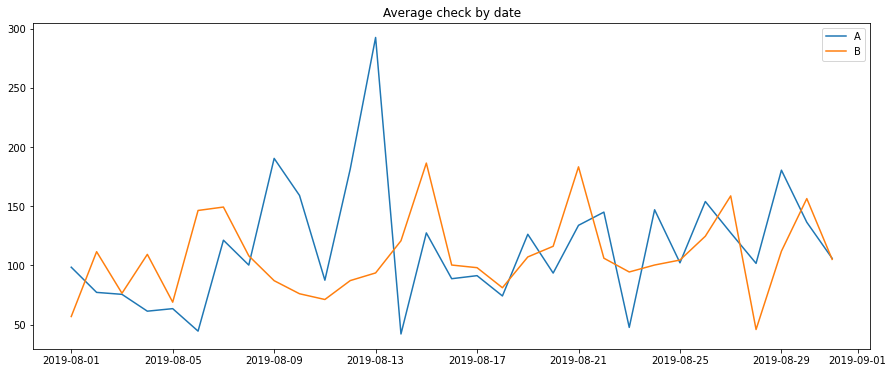

In [39]:
by_date_a1['avch']=by_date_a1['revenue']/by_date_a1['purchases']
by_date_b1['avch']=by_date_b1['revenue']/by_date_b1['purchases']
plt.plot(by_date_a1['date'], by_date_a1['avch'], label='A')
plt.plot(by_date_b1['date'], by_date_b1['avch'], label='B')
plt.title('Average check by date')
plt.legend()
plt.show()

Here we see, that graph of average check by date also very 'peaky', and we have approximately same peaks and lows on graph for two groups.

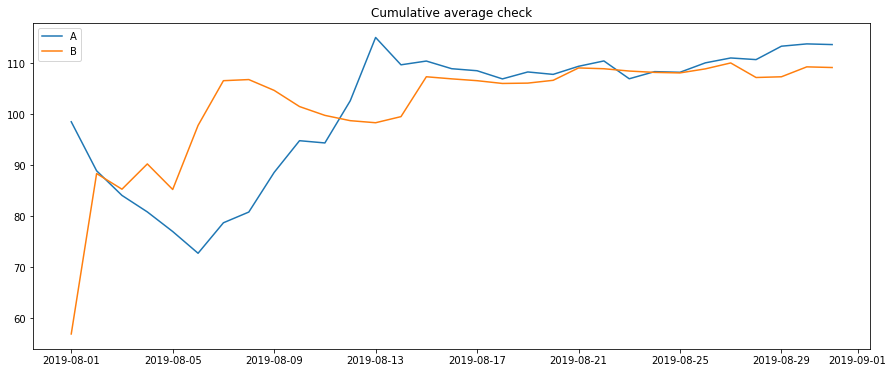

In [40]:
plt.plot(by_date_a1['date'], by_date_a1['cumul_avch'], label='A')
plt.plot(by_date_b1['date'], by_date_b1['cumul_avch'], label='B')
plt.title('Cumulative average check')
plt.legend()
plt.show()

And that was graph on cumulative average check for both groups. And seems that after two weeks from start of AB-test behavior of two groups had been normalized. And seems that cumulative average check for group B is less.

    Conversion rate as the ratio of orders to the number of visits for each day. 

Here we have problem, because in table 'visits' we haven't got visitor_id, so we can't delete here users, that we deleted from table 'orders'.

So, I continue analysis with holding in mind this situation.

In [41]:
visits_a = visits[visits['group']=='A'].drop('group', axis=1).reset_index(drop=True)
visits_b = visits[visits['group']=='B'].drop('group', axis=1).reset_index(drop=True)
display(visits_a.head())
display(visits_b.head())

,date,visits
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


,date,visits
0,2019-08-01,713
1,2019-08-02,581
2,2019-08-03,509
3,2019-08-04,770
4,2019-08-05,707


We separated data by groups, and now we need to connect those tables to orders.

In [42]:
by_date_a1 = by_date_a1.merge(visits_a, on='date')
by_date_a1.head()

,date,revenue,purchases,buyers,cumul_rev,cumul_purch,cumul_avch,avch,visits
0,2019-08-01,2266.6,23,19,2266.6,23,98.547826,98.547826,719
1,2019-08-02,1468.3,19,18,3734.9,42,88.926190,77.278947,619
2,2019-08-03,1815.2,24,24,5550.1,66,84.092424,75.633333,507
3,2019-08-04,675.5,11,11,6225.6,77,80.851948,61.409091,717
4,2019-08-05,1398.0,22,22,7623.6,99,77.006061,63.545455,756


In [43]:
by_date_b1 = by_date_b1.merge(visits_b, on='date')
by_date_b1.head()

,date,revenue,purchases,buyers,cumul_rev,cumul_purch,cumul_avch,avch,visits
0,2019-08-01,967.2,17,17,967.2,17,56.894118,56.894118,713
1,2019-08-02,2568.1,23,22,3535.3,40,88.382500,111.656522,581
2,2019-08-03,1071.6,14,14,4606.9,54,85.312963,76.542857,509
3,2019-08-04,1531.6,14,13,6138.5,68,90.272059,109.400000,770
4,2019-08-05,1449.3,21,21,7587.8,89,85.256180,69.014286,707


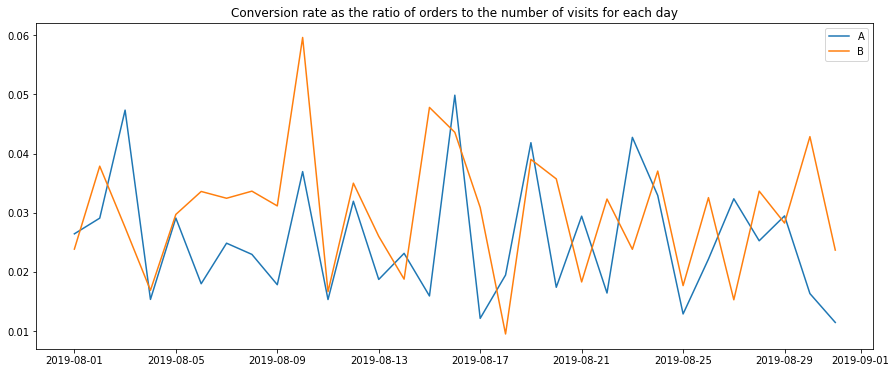

In [44]:
by_date_a1['conversion']=by_date_a1['buyers']/by_date_a1['visits']
by_date_b1['conversion']=by_date_b1['buyers']/by_date_b1['visits']

plt.plot(by_date_a1['date'], by_date_a1['conversion'], label='A')
plt.plot(by_date_b1['date'], by_date_b1['conversion'], label='B')
plt.title('Conversion rate as the ratio of orders to the number of visits for each day')
plt.legend()
plt.show()

We see peaks and lows approximately in same places.

Overall conversion A:

In [45]:
by_date_a1['buyers'].sum()/by_date_a1['visits'].sum()

0.024391545687446628

Overall conversion B:

In [46]:
by_date_b1['buyers'].sum()/by_date_b1['visits'].sum()

0.02870585747515331

We see, that overall converation for group B is higher on ~0,4%. And we have seen earlier, that average check for group B is a little bit lower. This is quite understandable - people make more orders, because of lower check.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Could you please also plot the relative difference in cumulative average order size. 

<div class="alert alert-info"> <b>Sorry, I don't understand what you mean here? I have already above graph named "Cumulative average check", it is not what you ask for?
    
Or maybe this?:</b></div>  

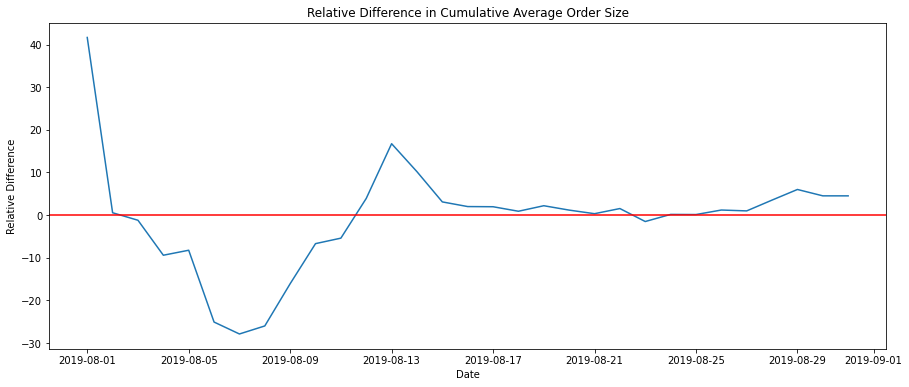

In [47]:
relative_differences = []
for i in range(0, len(by_date_a1['date'])):
    relative_difference = by_date_a1['cumul_avch'][i] - by_date_b1['cumul_avch'][i]
    relative_differences.append(relative_difference)

plt.plot(by_date_a1['date'], relative_differences)
plt.xlabel('Date')
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.ylabel('Relative Difference')
plt.title('Relative Difference in Cumulative Average Order Size')
plt.show()    

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Indeed, this graph helps to see the presence of sudden peaks, so it could be helpful to study data without outliers. Also, interesting to note that difference has been stabilized in the last couple of days.

    Order prices and number of orders per user

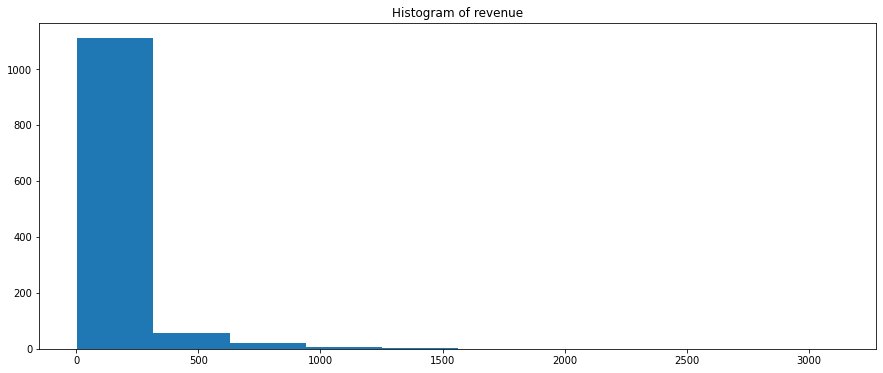

In [48]:
plt.hist(orders['revenue'])
plt.title('Histogram of revenue')
plt.show()

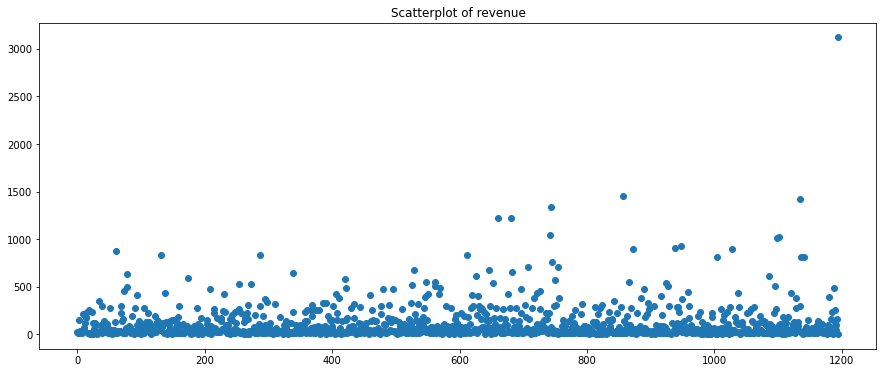

In [49]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Scatterplot of revenue')
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great scaterplots. Additionally you can color two groups on this graph using other 'hue' parameter (https://seaborn.pydata.org/generated/seaborn.scatterplot.html) or different data sources (https://moonbooks.org/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/)

And also you could check another scaterplot but without outliers.

Most of orders less than 500.

In [50]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[280.8 428.3 900.7]


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
You correctly identified 90,95th and 99th percentiles. 

Only 5% of all orders more than 428.3

In [51]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsers.columns = ['visitor_id', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(20))

      visitor_id  orders
590   2458001652      11
1022  4256040402      11
568   2378935119       9
486   2038680547       8
916   3803269165       5
896   3717692402       5
743   3062433592       5
55     237748145       5
299   1230306981       5
44     199603092       5
618   2587333274       4
393   1614305549       4
114    457167155       4
931   3891541246       3
503   2108163459       3
97     393266494       3
936   3908431265       3
676   2780786433       3
725   2988190573       3
490   2044997962       3


In [52]:
ordersByUsers['orders'].mean()

1.1611650485436893

We see several users, that made more than 3 orders. Average is 1.16 orders per user.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Could you please plot scaterplots and percentiles also for average orders per user?

<div class="alert alert-info"> <b>Ok, did it below:</b></div>  

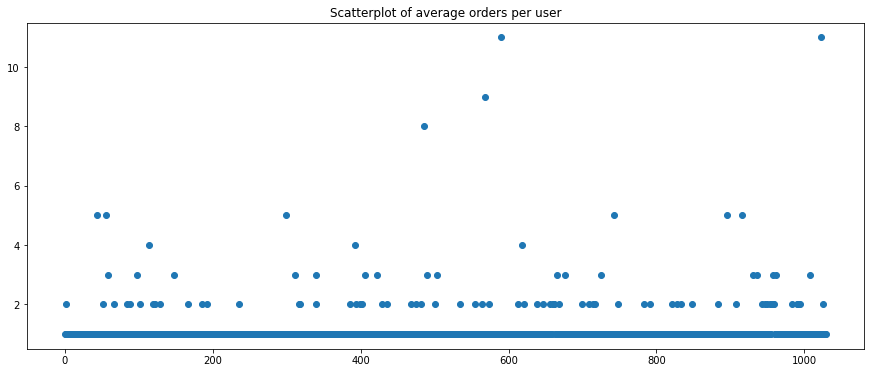

In [53]:
x_values = pd.Series(range(0, len(ordersByUsers['visitor_id'])))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Scatterplot of average orders per user')
plt.show()

In [54]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Only 5% of users made more than 2 orders, and only 1% made 4 and more orders.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Well done, everything is correct here. 

    The statistical significance of the difference in conversion between the groups using the raw data

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Сould you please formulate a null hypothesis and an alternative hypothesis for each question before actual testing in the markdown box: 
    
    H0: 
    H1:
    
And also describe why the following stat. method has been selected/ 

H0: We have no the statistical significance of the difference in conversion between the groups using the raw data.

H1: We have the statistical significance of the difference in conversion between the groups using the raw data.

For check this hypothesis I will use test of proportions, because this test is the test to determine whether the two populations differ significantly on specific characteristics. (conversion = orders / visits, it is proportion)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Hypotheses have been formulated correctly. Thank you for adding them.

In [55]:
group_a_raw = orders[orders['group']=='A'].reset_index(drop=True)
group_b_raw = orders[orders['group']=='B'].reset_index(drop=True)

In [56]:
by_date_a_raw = group_a_raw.groupby(['date'])['transaction_id'].nunique().reset_index()
by_date_b_raw = group_b_raw.groupby(['date'])['transaction_id'].nunique().reset_index()

In [57]:
by_date_a_raw = by_date_a_raw.merge(visits_a, on='date')
by_date_b_raw = by_date_b_raw.merge(visits_b, on='date')

In [58]:
control_trials=by_date_a_raw['visits'].sum()
print("Trials:",control_trials)
control_successes=by_date_a_raw['transaction_id'].sum()
print("Successes:",control_successes)

Trials: 18736
Successes: 557


In [59]:
test_trials=by_date_b_raw['visits'].sum()
print("Trials:",test_trials)
test_successes=by_date_b_raw['transaction_id'].sum()
print("Successes:",test_successes)

Trials: 18916
Successes: 639


I prepared control (A) and test (B) groups for check statistical significance of the difference.

In [60]:
def check_hypothesis(successes1,trials1, successes2,trials2, alpha=0.05):
    p1 = successes1/trials1
    p2 = successes2/trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    distr = stats.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-value: ', p_value)
    if p_value<0.05:
        print('Reject H0')
    else:
        print('FTR H0')

In [61]:
check_hypothesis(control_successes,control_trials, test_successes,test_trials, alpha=0.05)

p-value:  0.02498223444077685
Reject H0


In [62]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([control_successes,test_successes], [control_trials,test_trials])
print('{0:0.3f}'.format(pval))

0.025


In [63]:
stat

-2.24167732441924

In [64]:
proportions_ztest([control_successes,test_successes], [control_trials,test_trials])

(-2.24167732441924, 0.02498223444077692)

On raw data, we rejected the null hypothesis, which means that we have the statistical significance of the difference in conversion between the groups using the raw data.

    The statistical significance of the difference in average order size between the groups using the raw data

H0: We have no the statistical significance of the difference in average order size between the groups using the raw data.

H1: We have the statistical significance of the difference in average order size between the groups using the raw data.

For check this hypothesis I will use t-test ot mann whitney test (in function i'll check normality of distributions), because we compare not proportions (percentage), but numbers.

In [65]:
by_date_a_raw_rev = group_a_raw.groupby(['date']).agg({'transaction_id' : 'nunique', 'revenue': 'sum'}).reset_index()
by_date_b_raw_rev = group_b_raw.groupby(['date']).agg({'transaction_id' : 'nunique', 'revenue': 'sum'}).reset_index()

In [66]:
by_date_a_raw_rev['avch'] = by_date_a_raw_rev['revenue'] / by_date_a_raw_rev['transaction_id']
by_date_b_raw_rev['avch'] = by_date_b_raw_rev['revenue'] / by_date_b_raw_rev['transaction_id']

In [67]:
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both normal, perform t-test.
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
    print(p_value)
    if p_value<alpha:
        print('Reject H0')
    else:
        print('Fail to Reject H0')

In [68]:
testing_average(by_date_a_raw_rev['avch'],by_date_b_raw_rev['avch'],alpha=0.05)

0.5449274247998621
Fail to Reject H0


On raw data, we can't reject the null hypothesis, which means that we have no the statistical significance of the difference in average order size between the groups using the raw data.


    The statistical significance of the difference in conversion between the groups using the filtered data

H0: We have no the statistical significance of the difference in conversion between the groups using the filtered data.

H1: We have the statistical significance of the difference in conversion between the groups using the filtered data.

This is the same, what was for raw data.

We already have filtered data - when we deleted all users, who were consisted in both groups.

In [69]:
by_date_a1.head()


,date,revenue,purchases,buyers,cumul_rev,cumul_purch,cumul_avch,avch,visits,conversion
0,2019-08-01,2266.6,23,19,2266.6,23,98.547826,98.547826,719,0.026426
1,2019-08-02,1468.3,19,18,3734.9,42,88.926190,77.278947,619,0.029079
2,2019-08-03,1815.2,24,24,5550.1,66,84.092424,75.633333,507,0.047337
3,2019-08-04,675.5,11,11,6225.6,77,80.851948,61.409091,717,0.015342
4,2019-08-05,1398.0,22,22,7623.6,99,77.006061,63.545455,756,0.029101


In [70]:
by_date_b1.head()

,date,revenue,purchases,buyers,cumul_rev,cumul_purch,cumul_avch,avch,visits,conversion
0,2019-08-01,967.2,17,17,967.2,17,56.894118,56.894118,713,0.023843
1,2019-08-02,2568.1,23,22,3535.3,40,88.382500,111.656522,581,0.037866
2,2019-08-03,1071.6,14,14,4606.9,54,85.312963,76.542857,509,0.027505
3,2019-08-04,1531.6,14,13,6138.5,68,90.272059,109.400000,770,0.016883
4,2019-08-05,1449.3,21,21,7587.8,89,85.256180,69.014286,707,0.029703


In [71]:
check_hypothesis(by_date_a1['purchases'].sum(),by_date_a1['visits'].sum(), by_date_b1['purchases'].sum(),by_date_b1['visits'].sum(), alpha=0.05)

p-value:  0.018303994456679407
Reject H0


On foltered data, we rejected the null hypothesis, which means that the groups behave differently with statistical significance.

    The statistical significance of the difference in average order size between the groups using the filtered data

H0: We have no the statistical significance of the difference in average order size between the groups using the filtered data.

H1: We have the statistical significance of the difference in average order size between the groups using the filtered data.

This is the same, what was for raw data.

In [72]:
testing_average(by_date_a1['avch'],by_date_b1['avch'],alpha=0.05)

0.7999480597723025
Fail to Reject H0


Also as on raw data, on filtered date we can't reject the null hypothesis, which means that the groups behave same (in perspective of average check)

    Decision based on the test results

First of all need to check, why we have same users in both groups - maybe it is technical issue.

From graphs we see, that group B has higher cumulative revenue, and overall convertation for group B is higher on ~0,4%, and it approved with statistical significance.

On graph of cumulatibe average check we saw that cumulative average check for group B is less. But after check it on statistical significance, we identified, that there is no statistical significance, so in perspective of average check groups behave same.

So I think, that we can stop AB-test and consider group B as the leader.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 



Thank you for your work 🤝

You did a great research with correct intermediate conclusions, clean code and good visualization. You managed to correctly apply the frameworks for testing hypotheses, identify anomalies in the data and perform all the statistical tests.

I also fully agree with your test results. In this project, you can fall into the "peeking problem" and wait until there is a difference in metrics, but doing so is wrong. You can read more here: https://gopractice.io/blog/peeking-problem/#:~:text=by%20Oleg%20Yakubenkov-,Peeking%20problem%20%E2%80%93%20the%20fatal%20mistake%20in%20A%2FB%20testing%20and,A%2FB%20test%20is%20over
    


    
</div>